In [6]:
import pandas as pd
df = pd.read_csv("/Users/pradhnyesh/Documents/PJT-1/all_frame_features_segmented.csv")

# Assuming labels: 0 = dry, 1 = wet
dry = df[df['label_name'] == 'dry']
wet = df[df['label_name'] == 'wet']


In [7]:
# For GMM with 3 segments
dry_means = dry[['seg0_percentage', 'seg1_percentage', 'seg2_percentage']].mean()
wet_means = wet[['seg0_percentage', 'seg1_percentage', 'seg2_percentage']].mean()
print("Dry means:", dry_means)
print("Wet means:", wet_means)


Dry means: seg0_percentage    33.604462
seg1_percentage    33.315557
seg2_percentage    33.079982
dtype: float64
Wet means: seg0_percentage    33.381279
seg1_percentage    33.487091
seg2_percentage    33.131630
dtype: float64


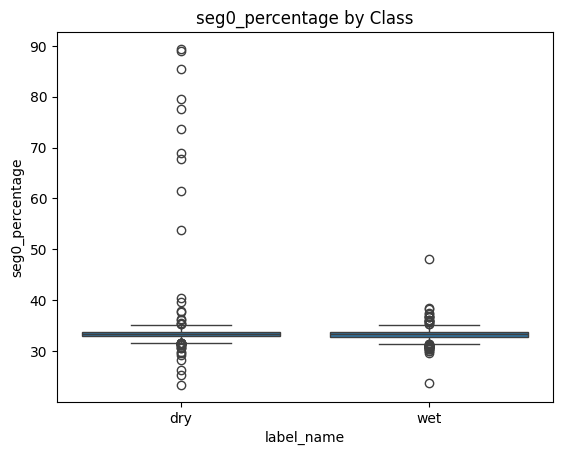

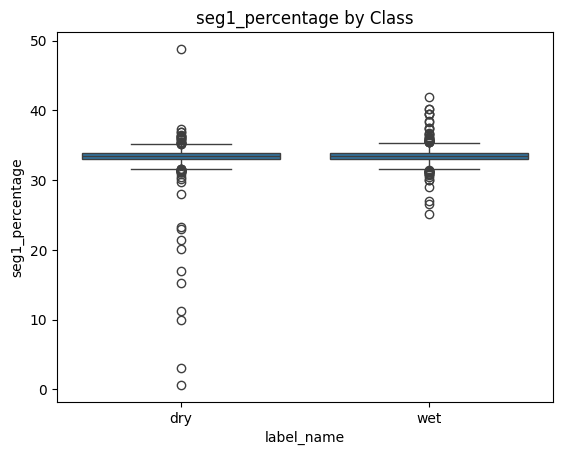

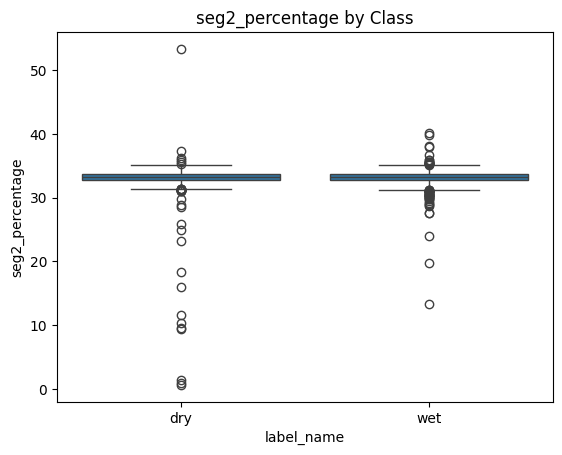

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

for seg in ['seg0_percentage', 'seg1_percentage', 'seg2_percentage']:
    sns.boxplot(x='label_name', y=seg, data=df)
    plt.title(f'{seg} by Class')
    plt.show()


In [11]:
from scipy.stats import ttest_ind

# For each segment percentage
for seg in ['seg0_percentage', 'seg1_percentage', 'seg2_percentage']:
    stat, p = ttest_ind(dry[seg], wet[seg], equal_var=False)
    print(f"{seg}: p-value={p:.3g} (stat={stat:.2f})")
# p < 0.05 => statistically significant difference


seg0_percentage: p-value=0.00795 (stat=2.66)
seg1_percentage: p-value=0.000477 (stat=-3.50)
seg2_percentage: p-value=0.362 (stat=-0.91)


In [12]:
print(dry[['seg0_mean_intensity', 'seg1_mean_intensity', 'seg2_mean_intensity']].mean())
print(wet[['seg0_mean_intensity', 'seg1_mean_intensity', 'seg2_mean_intensity']].mean())


seg0_mean_intensity    124.093278
seg1_mean_intensity    123.278980
seg2_mean_intensity    120.229521
dtype: float64
seg0_mean_intensity    130.749133
seg1_mean_intensity    135.305456
seg2_mean_intensity    130.105373
dtype: float64
